### Histogram of Oriented Gradients (HOG)

In [1]:
import helpers
import cv2
import glob
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from IPython.display import HTML
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from moviepy.editor import VideoFileClip
from scipy.ndimage.measurements import label
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
cars = []
cars.extend(glob.glob('data/vehicles/GTI_Far/*.png'))
cars.extend(glob.glob('data/vehicles/GTI_Left/*.png'))
cars.extend(glob.glob('data/vehicles/GTI_MiddleClose/*.png'))
cars.extend(glob.glob('data/vehicles/GTI_Right/*.png'))
cars.extend(glob.glob('data/vehicles/KITTI_extracted/*.png'))
notcars = []
notcars.extend(glob.glob('data/non-vehicles/Extras/*.png'))
notcars.extend(glob.glob('data/non-vehicles/GTI/*.png'))
print(len(cars), len(notcars))

8792 8968


### Explore hog features

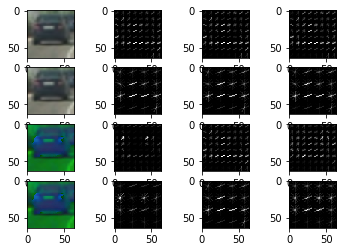

In [3]:
# Hog features of a car with different color space and parameters
img1 = cv2.imread(cars[1])
plt.subplot(4,4,1)
helpers.plt_cv2(img1)
plt.subplot(4,4,2)
hog1, v1 = helpers.get_hog_features(img1[:,:,0], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,3)
hog1, v1 = helpers.get_hog_features(img1[:,:,1], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,4)
hog1, v1 = helpers.get_hog_features(img1[:,:,2], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

plt.subplot(4,4,5)
helpers.plt_cv2(img1)
plt.subplot(4,4,6)
hog1, v1 = helpers.get_hog_features(img1[:,:,0], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,7)
hog1, v1 = helpers.get_hog_features(img1[:,:,1], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,8)
hog1, v1 = helpers.get_hog_features(img1[:,:,2], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2HLS)
plt.subplot(4,4,9)
helpers.plt_cv2(img2)
plt.subplot(4,4,10)
hog1, v1 = helpers.get_hog_features(img2[:,:,0], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,11)
hog1, v1 = helpers.get_hog_features(img2[:,:,1], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,12)
hog1, v1 = helpers.get_hog_features(img2[:,:,2], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

plt.subplot(4,4,13)
helpers.plt_cv2(img2)
plt.subplot(4,4,14)
hog1, v1 = helpers.get_hog_features(img2[:,:,0], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,15)
hog1, v1 = helpers.get_hog_features(img2[:,:,1], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,16)
hog1, v1 = helpers.get_hog_features(img2[:,:,2], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

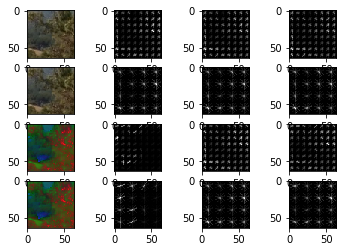

In [4]:
# Hog features of a background with different color space and parameters
img1 = cv2.imread(notcars[1])
plt.subplot(4,4,1)
helpers.plt_cv2(img1)
plt.subplot(4,4,2)
hog1, v1 = helpers.get_hog_features(img1[:,:,0], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,3)
hog1, v1 = helpers.get_hog_features(img1[:,:,1], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,4)
hog1, v1 = helpers.get_hog_features(img1[:,:,2], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

plt.subplot(4,4,5)
helpers.plt_cv2(img1)
plt.subplot(4,4,6)
hog1, v1 = helpers.get_hog_features(img1[:,:,0], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,7)
hog1, v1 = helpers.get_hog_features(img1[:,:,1], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,8)
hog1, v1 = helpers.get_hog_features(img1[:,:,2], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2HLS)
plt.subplot(4,4,9)
helpers.plt_cv2(img2)
plt.subplot(4,4,10)
hog1, v1 = helpers.get_hog_features(img2[:,:,0], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,11)
hog1, v1 = helpers.get_hog_features(img2[:,:,1], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,12)
hog1, v1 = helpers.get_hog_features(img2[:,:,2], 9, 8, 2, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

plt.subplot(4,4,13)
helpers.plt_cv2(img2)
plt.subplot(4,4,14)
hog1, v1 = helpers.get_hog_features(img2[:,:,0], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,15)
hog1, v1 = helpers.get_hog_features(img2[:,:,1], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')
plt.subplot(4,4,16)
hog1, v1 = helpers.get_hog_features(img2[:,:,2], 9, 16, 1, vis=True, feature_vec=False)
plt.imshow(v1, cmap='gray')

### Load the training data and train the SVM model

In [5]:
### Parameters
color_space = 'HLS' # Can be BGR, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 1 # HOG cells per block
hog_channel = 2 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off

# Train the model
car_features = helpers.extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = helpers.extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
dist_pickle = {
    'svc':svc,
    'X_scaler':X_scaler
}

Using: 9 orientations 8 pixels per cell and 1 cells per block
Feature vector length: 576
12.63 Seconds to train SVC...
Test Accuracy of SVC =  0.9133


In [6]:
pickle.dump(dist_pickle, open( "svc.p", "wb" ))
# dist_pickle = pickle.load(open("svcHLS2T.p", "rb"))
# svc = dist_pickle['svc']
# X_scaler = dist_pickle['X_scaler']

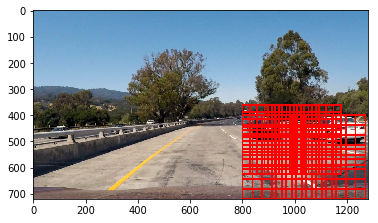

In [7]:
image = cv2.imread('test_images/test1.jpg')
draw_image = image.copy()

windows = []

windows.extend(helpers.slide_window(image, x_start_stop=[800, 1200], y_start_stop=[360, 650], 
                        xy_window=(96, 96), xy_overlap=(0.7, 0.7)))

windows.extend(helpers.slide_window(image, x_start_stop=[800, None], y_start_stop=[400, None], 
                        xy_window=(128, 128), xy_overlap=(0.7, 0.7)))


hot_windows = helpers.search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

  
window_img = helpers.draw_boxes(draw_image, windows, color=(0, 0, 255), thick=6)     

plot_img=cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB)
plt.imshow(plot_img)

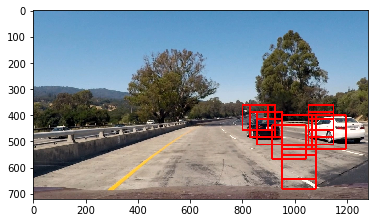

In [8]:
window_img = helpers.draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)     

plot_img=cv2.cvtColor(window_img, cv2.COLOR_BGR2RGB)
plt.imshow(plot_img)

### Remove false positives and duplicates

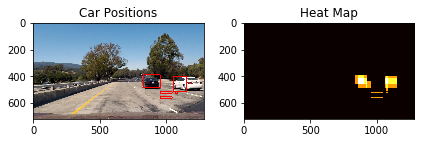

In [9]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = helpers.add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = helpers.apply_threshold(heat,2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = helpers.draw_labeled_bboxes(np.copy(image), labels)

draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [9]:
smooth_windows = []
def process_image(image):
    """detect the vehicles and draw the bounding boxes"""
    global smooth_windows
    global windows
    
    nframe = 30
    threshold = 30
    
    hot_windows = helpers.search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat) 

    smooth_windows.append(hot_windows)
   
   
    if len(smooth_windows) < nframe:
        box_list = [item for sublist in smooth_windows  for item in sublist]
    else: 
        box_list = [item for sublist in smooth_windows[-nframe:]  for item in sublist]

        
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = helpers.add_heat(heat,box_list)

    # Apply threshold to help remove false positives
    heat = helpers.apply_threshold(heat, threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = helpers.draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img

In [10]:
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
white_output = 'test.mp4'
clip1 = VideoFileClip("project_video.mp4")#.subclip(20, 23)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test.mp4
[MoviePy] Writing video test.mp4


100%|█████████▉| 1260/1261 [07:12<00:00,  3.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test.mp4 

CPU times: user 7min 3s, sys: 7.62 s, total: 7min 11s
Wall time: 7min 12s
